In [1]:
from pysph.solver.utils import load
from pysph.solver.utils import iter_output
import h5py

In [2]:
path = "sine_velocity_profile_output/sine_velocity_profile_00000.hdf5"
# data = load(path)

In [3]:
# data = h5py.File(path, 'r')

## Energy Spectrum

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from energy_spectrum import compute_scalar_energy_spectrum, compute_energy_spectrum # type: ignore

In [5]:
twopi = 2 * np.pi
sin, cos = np.sin, np.cos

### Single Frequency

#### 1D

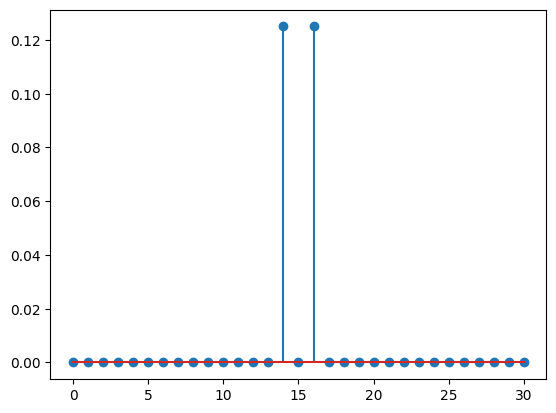

Max (us, vs, ws) = 0.5, 0.0, 0.0
Max (Eu, Ev, Ew) = 0.125, 0.0, 0.0 at [(14,)] || (0.5^2)/2
Max Ek: 0.125 at [1] || (0.125*2)/2 because 2 peaks


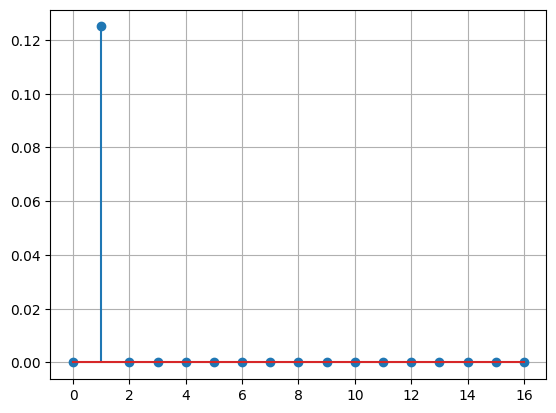

In [6]:
sr = 51
_x = np.arange(1/(2*sr), 1., 1. / sr)
x = _x
u = - cos(twopi * x)
U0 = 1.

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=None, w=None, U0=U0, debug=True
    )
plt.stem(EK_U);
plt.show()

k, Ek = compute_scalar_energy_spectrum(EK_U)
plt.stem(Ek)
plt.grid()
print(f"Max (us, vs, ws) = {np.max(u_spectrum)}, {np.max(v_spectrum)}, {np.max(w_spectrum)}")
max_idx = np.argmax(EK_U)
max_idx = np.unravel_index(max_idx, EK_U.shape)
print(f"Max (Eu, Ev, Ew) = {np.max(EK_U)}, {np.max(EK_V)}, {np.max(EK_W)} at [{max_idx}] || (0.5^2)/2")
print(f"Max Ek: {np.max(Ek)} at [{np.argmax(Ek)}] || (0.125*2)/2 because 2 peaks")


#### 2D

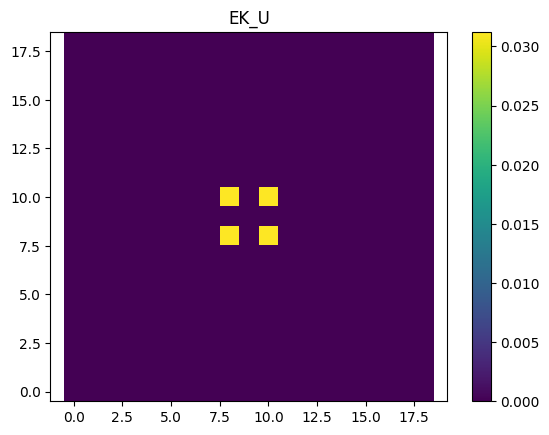

Max (us, vs, ws) = 0.25, 0.24999999999999997, 0.0
Max (Eu, Ev, Ew) = 0.03125, 0.031249999999999993, 0.0 at [(8, 8)] || (0.25^2)/2
Max Ek: 0.12499999999999997 at [1] || (0.03125*8)/2 beacuse 8 peaks


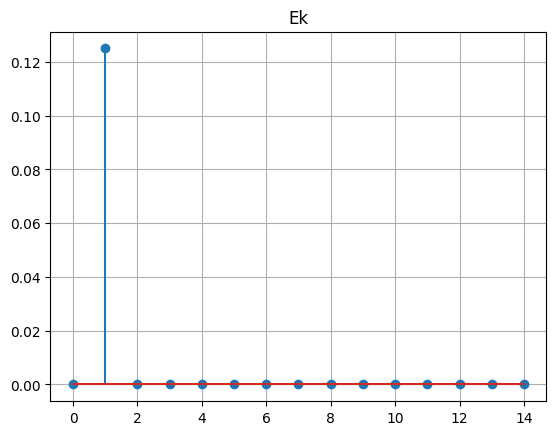

In [174]:
sr = 19
_x = np.arange(1/(2*sr), 1., 1. / sr)
x, y = np.meshgrid(_x, _x)
# u = sin(twopi * x) + sin(2 * twopi * y)
# v = u
u = - cos(twopi * x) * sin(twopi * y)
v = sin(twopi * x) * cos(twopi * y)
U0 = 1.

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=v, w=None, U0=U0, debug=True
    )
plt.imshow(EK_U)
plt.colorbar()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.title("EK_U")
plt.show()

k, Ek = compute_scalar_energy_spectrum(EK_U, EK_V, ord=np.inf)
plt.stem(Ek)
plt.grid()
plt.title("Ek")
max_idx = np.argmax(EK_U)
max_idx = np.unravel_index(max_idx, EK_U.shape)
print(f"Max (us, vs, ws) = {np.max(u_spectrum)}, {np.max(v_spectrum)}, {np.max(w_spectrum)}")
print(f"Max (Eu, Ev, Ew) = {np.max(EK_U)}, {np.max(EK_V)}, {np.max(EK_W)} at [{max_idx}] || (0.25^2)/2")
print(f"Max Ek: {np.max(Ek)} at [{np.argmax(Ek)}] || (0.03125*8)/2 beacuse 8 peaks")

#### 3D

Max (us, vs, ws) = 0.125, 0.125, 0.125
Max (Eu, Ev, Ew) = 0.0078125, 0.0078125, 0.0078125 at [(17, 17, 17)] || (0.125^2)/2
Max Ek: 0.09374999999999997 at [2] || (0.0078125*24)/2 because 24 peaks


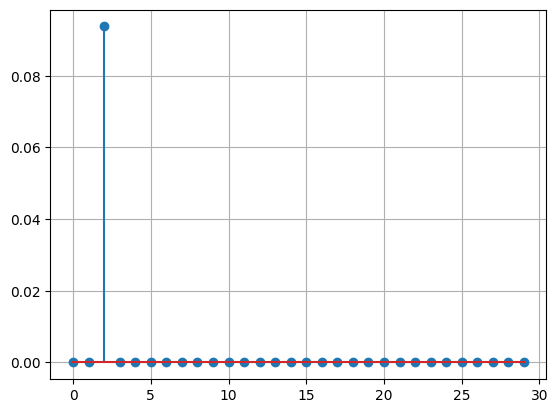

In [206]:
x, y, z = np.meshgrid(_x, _x, _x)
u = - cos(twopi * x) * sin(twopi * y) * sin(twopi * z)
v = sin(twopi * x) * cos(twopi * y) * sin(twopi * z)
w = sin(twopi * x) * sin(twopi * y) * cos(twopi * z)

EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=v, w=w, U0=U0, debug=True
    )

k, Ek = compute_scalar_energy_spectrum(EK_U, EK_V, EK_W, ord=2)
plt.stem(Ek)
plt.grid()
max_idx = np.argmax(EK_U)
max_idx = np.unravel_index(max_idx, EK_U.shape)
print(f"Max (us, vs, ws) = {round(np.max(u_spectrum), 8)}, {round(np.max(v_spectrum), 8)}, {round(np.max(w_spectrum), 8)}")
print(f"Max (Eu, Ev, Ew) = {round(np.max(EK_U), 8)}, {round(np.max(EK_V), 8)}, {round(np.max(EK_W), 8)} at [{max_idx}] || (0.125^2)/2")
print(f"Max Ek: {np.max(Ek)} at [{np.argmax(Ek)}] || (0.0078125*24)/2 because 24 peaks")

### Summary

```
1D
* Max (us, vs, ws) = 0.5, 0.0, 0.0 || Max(u)/2^1
* Max (Eu, Ev, Ew) = 0.125, 0.0, 0.0 at [(14,)] || (0.5^2)/2
* Max Ek: 0.125 at [1] || (0.125*2)/2 because 2 peaks

2D
* Max (us, vs, ws) = 0.25, 0.25, 0.0 || Max(u)/2^2
* Max (Eu, Ev, Ew) = 0.03125, 0.03125, 0.0 at [(14, 14)] || (0.25^2)/2
* Max Ek: 0.125 || (0.03125*8)/2 beacuse 8 peaks

3D
* Max (us, vs, ws) = 0.125, 0.125, 0.125 || Max(u)/2^3
* Max (Eu, Ev, Ew) = 0.0078125, 0.0078125, 0.0078125 at [(17, 17, 17)] || (0.125^2)/2
* Max Ek: 0.09375 || (0.0078125*24)/2 because 24 peaks 
    at [1] if ord=np.inf, at [2] if ord=2

* Max (us, vs, ws) = 0.125, 0.625, 0.125 || Max(u)/2^3
* Max (Eu, Ev, Ew) = 0.0078125, 0.1953125, 0.0078125 at [(14, 14, 14)] || (0.125^2)/2
* Max Ek: 0.84375 || (0.0078125*24)/2 because 24 peaks
```

## Multiple Frequencies

Velocity is squared to get the energy spectrum.
Therefore, the slope of the energy spectrum will be 2 times the slope of the velocity spectrum.

In [53]:
# Machine precision
EPS = np.finfo(float).eps


### 1D

Slope of velocity spectrum: -2
slope = -3.999999999999999, intercept = -0.9030899869919442, r_value = -1.0, p_value = 3.6676382343853063e-149, std_err = 0.0


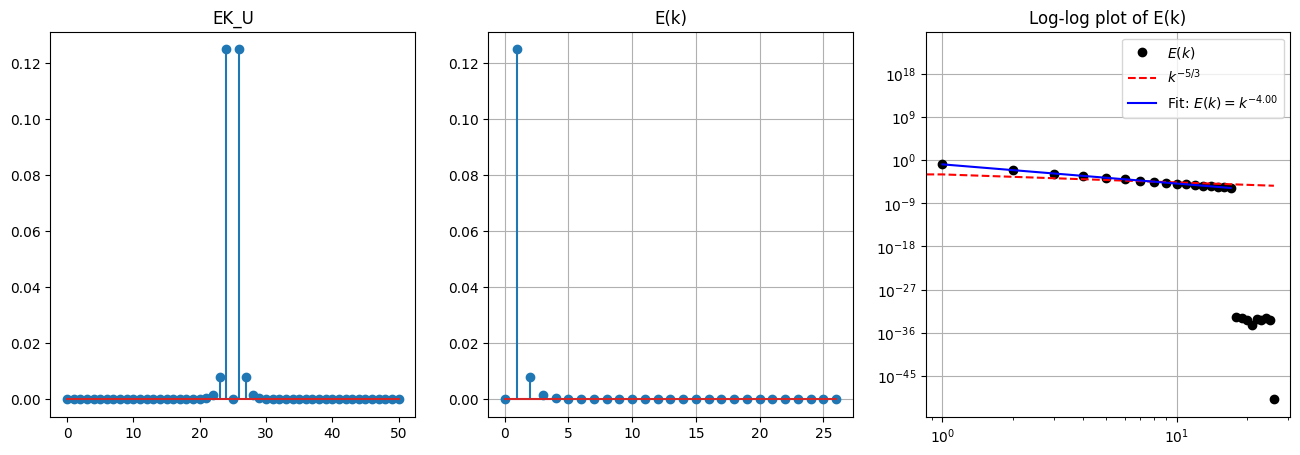

In [220]:
sr = 51
_x = np.arange(1/(2*sr), 1., 1. / sr)
x = _x
num_freqs = 17
u = np.zeros_like(x)
slope_vel = -2
for i in range(1, num_freqs + 1):
    u += -cos(i * twopi * x) * i**(slope_vel)
U0 = 1.

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=None, w=None, U0=U0, debug=True
    )

k, Ek = compute_scalar_energy_spectrum(EK_U)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.stem(EK_U);
plt.title("EK_U")

plt.subplot(1, 3, 2)
plt.stem(Ek)
plt.grid()
plt.title("E(k)")

# Get all datapoints of E(k) greater than 1e-8
tol = 1e-8
k_cacl = k[Ek > tol]
Ek_cacl = Ek[Ek > tol]

k_calc_log = np.log10(k_cacl)
Ek_calc_log = np.log10(Ek_cacl)
slope, intercept, r_value, p_value, std_err = linregress(k_calc_log, Ek_calc_log)

# Calculate fit
k_fit = k_cacl
Ek_fit = 10**(slope * np.log10(k_fit) + intercept)

plt.subplot(1, 3, 3)
plt.loglog(k, Ek, 'ko', label=r'$E(k)$')
plt.loglog(k, 1e-3 * (EPS+k)**(-5/3), 'r--', label=r'$k^{-5/3}$')
plt.loglog(k_fit, Ek_fit, 'b-', label=f"Fit: $E(k) = k^{{{slope:.2f}}}$")
# plt.ylim(1e-8, 1e0)
plt.legend()
plt.grid()
plt.title("Log-log plot of E(k)")


print(f"Slope of velocity spectrum: {slope_vel}")
print(f"slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

In [221]:
# print all values of Ek upto 4 decimal places without using round()
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})
print(f"Ek = {Ek}")

Ek = [0.000000 0.125000 0.007812 0.001543 0.000488 0.000200 0.000096 0.000052
 0.000031 0.000019 0.000012 0.000009 0.000006 0.000004 0.000003 0.000002
 0.000002 0.000001 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 0.000000]


[0.000000 0.125000 0.007812 0.001543 0.000488 0.000200 0.000096 0.000052
 0.000031 0.000019 0.000013 0.000009 0.000006 0.000004 0.000003 0.000002
 0.000002 0.000001 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 0.000000]


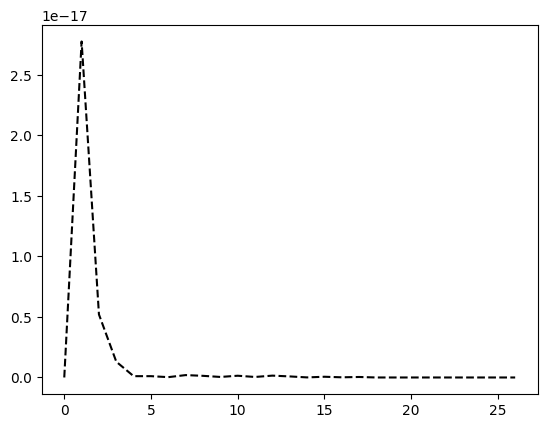

In [223]:
a = np.arange(1, num_freqs + 1, dtype=float)
a = a**(2*slope_vel)/8
b = np.insert(a, 0, 0)
b = np.append(b, np.zeros(len(k) - len(b)))
print(b)
plt.plot(k, np.abs(Ek - b), 'k--')

### 2D

Slope of velocity spectrum: -1
Slope = -1.9999999999999998, intercept = -0.9030899869919442, r_value = -1.0, p_value = 5.8534851285390365e-90, std_err = 0.0


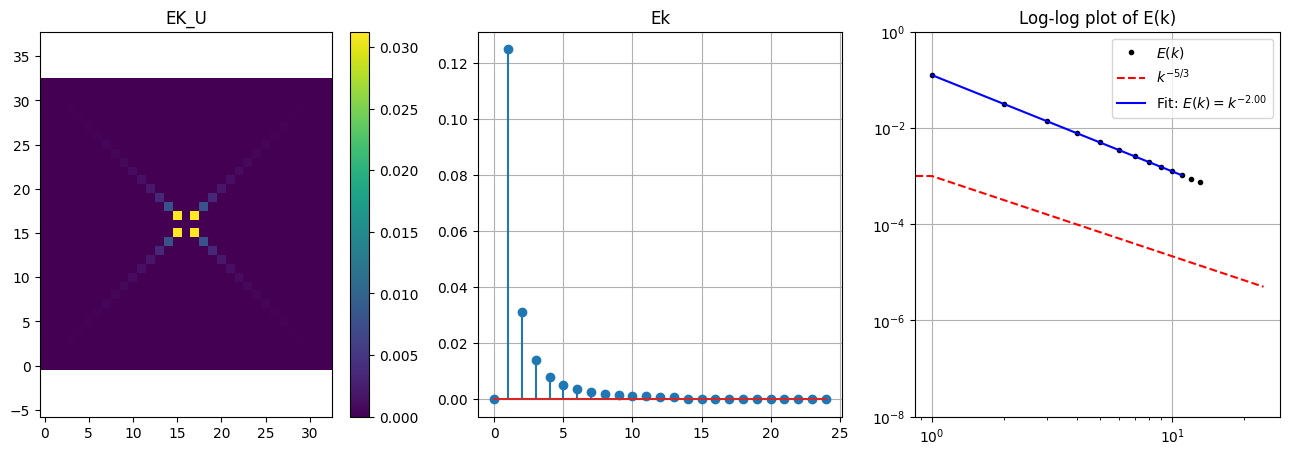

In [224]:
sr = 33
_x = np.arange(1/(2*sr), 1., 1. / sr)
x, y = np.meshgrid(_x, _x)
num_freqs = 13
u = np.zeros_like(x)
v = np.zeros_like(y)
slope_vel = -1
for i in range(1, num_freqs + 1):
    u += -cos(i * twopi * x) * sin(i * twopi * y) * i**(slope_vel)
    v += sin(i * twopi * x) * cos(i * twopi * y) * i**(slope_vel)
U0 = 1.

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=v, w=None, U0=U0, debug=True
    )

k, Ek = compute_scalar_energy_spectrum(EK_U, EK_V, ord=np.inf)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.imshow(EK_U)
plt.colorbar()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.title("EK_U")

plt.subplot(1, 3, 2)
plt.stem(Ek)
plt.grid()
plt.title("Ek")

# Get all datapoints of E(k) greater than 1e-8 and k between 0 and len(k)/2
tol = 1e-8
cond_len = k < len(k)/2 - 1
cond_tol = Ek > tol
cond = cond_len & cond_tol
k_cacl = k[cond]
Ek_cacl = Ek[cond]

k_calc_log = np.log10(k_cacl)
Ek_calc_log = np.log10(Ek_cacl)
slope, intercept, r_value, p_value, std_err = linregress(k_calc_log, Ek_calc_log)

# Calculate fit
k_fit = k_cacl
Ek_fit = 10**(slope * np.log10(k_fit) + intercept)

plt.subplot(1, 3, 3)
plt.loglog(k, Ek, 'k.', label=r'$E(k)$')
plt.loglog(k, 1e-3 * (EPS+k)**(-5/3), 'r--', label=r'$k^{-5/3}$')
plt.loglog(k_fit, Ek_fit, 'b-', label=f"Fit: $E(k) = k^{{{slope:.2f}}}$")
plt.ylim(1e-8, 1e0)
plt.legend()
plt.grid()
plt.title("Log-log plot of E(k)")


print(f"Slope of velocity spectrum: {slope_vel}")
print(f"Slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

In [225]:
print(f"{Ek = }")

Ek = array([0.000000, 0.125000, 0.031250, 0.013889, 0.007812, 0.005000,
       0.003472, 0.002551, 0.001953, 0.001543, 0.001250, 0.001033,
       0.000868, 0.000740, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000])


b = array([0.000000, 0.125000, 0.031250, 0.013889, 0.007812, 0.005000,
       0.003472, 0.002551, 0.001953, 0.001543, 0.001250, 0.001033,
       0.000868, 0.000740, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000])


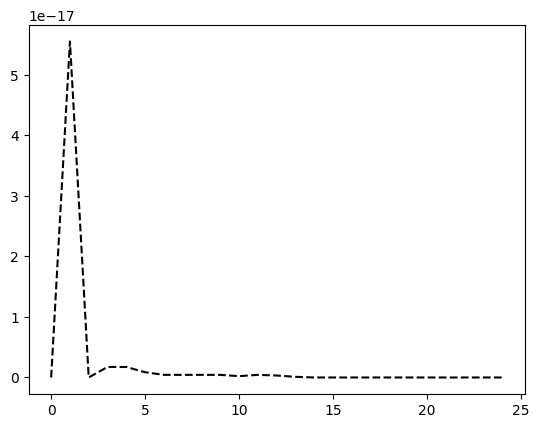

In [226]:
a = np.arange(1, num_freqs + 1, dtype=float)
a = a**(2*slope_vel)/8
b = np.insert(a, 0, 0)
b = np.append(b, np.zeros(len(k) - len(b)))
print(f"{b = }")
plt.plot(k, np.abs(Ek - b), 'k--')

### 3D

Slope of velocity spectrum: -1
Slope = -1.9999999999999998, intercept = -1.0280287236002443, r_value = -0.9999999999999999, p_value = 1.8924448489215026e-87, std_err = 8.985738294654e-09


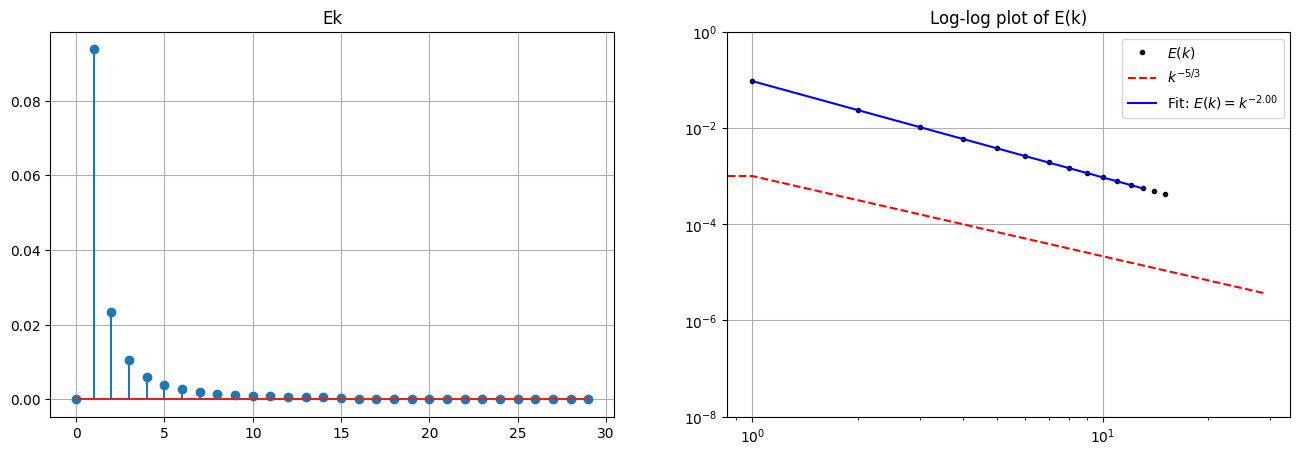

In [227]:
sr = 33
_x = np.arange(1/(2*sr), 1., 1. / sr)
x, y, z = np.meshgrid(_x, _x, _x)
num_freqs = 15
u, v, w = np.zeros_like(x), np.zeros_like(y), np.zeros_like(z)
slope_vel = -1
for i in range(1, num_freqs + 1):
    u += -cos(i * twopi * x) * sin(i * twopi * y) * sin(i * twopi * z) * i**(slope_vel)
    v += sin(i * twopi * x) * cos(i * twopi * y) * sin(i * twopi * z) * i**(slope_vel)
    w += - sin(i * twopi * x) * sin(i * twopi * y) * cos(i * twopi * z) * i**(slope_vel)

EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=v, w=w, U0=U0, debug=True
    )

k, Ek = compute_scalar_energy_spectrum(EK_U, EK_V, EK_W, ord=np.inf)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.stem(Ek)
plt.grid()
plt.title("Ek")


# Get all datapoints of E(k) greater than 1e-8 and k between 0 and len(k)/2
tol = 1e-8
cond_len = k < len(k)/2 - 1
cond_tol = Ek > tol
cond = cond_len & cond_tol
k_cacl = k[cond]
Ek_cacl = Ek[cond]

k_calc_log = np.log10(k_cacl)
Ek_calc_log = np.log10(Ek_cacl)
slope, intercept, r_value, p_value, std_err = linregress(k_calc_log, Ek_calc_log)

# Calculate fit
k_fit = k_cacl
Ek_fit = 10**(slope * np.log10(k_fit) + intercept)

plt.subplot(1, 2, 2)
plt.loglog(k, Ek, 'k.', label=r'$E(k)$')
plt.loglog(k, 1e-3 * (EPS+k)**(-5/3), 'r--', label=r'$k^{-5/3}$')
plt.loglog(k_fit, Ek_fit, 'b-', label=f"Fit: $E(k) = k^{{{slope:.2f}}}$")
plt.ylim(1e-8, 1e0)
plt.legend()
plt.grid()
plt.title("Log-log plot of E(k)")


print(f"Slope of velocity spectrum: {slope_vel}")
print(f"Slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

In [228]:
print(f"{Ek = }")

Ek = array([0.000000, 0.093750, 0.023437, 0.010417, 0.005859, 0.003750,
       0.002604, 0.001913, 0.001465, 0.001157, 0.000937, 0.000775,
       0.000651, 0.000555, 0.000478, 0.000417, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000])


b = array([0.000000, 0.093750, 0.023438, 0.010417, 0.005859, 0.003750,
       0.002604, 0.001913, 0.001465, 0.001157, 0.000937, 0.000775,
       0.000651, 0.000555, 0.000478, 0.000417, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000])


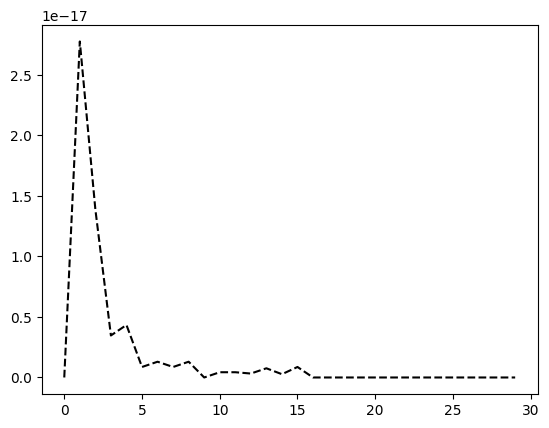

In [229]:
a = np.arange(1, num_freqs + 1, dtype=float)
a = 3*a**(2*slope_vel)/32
b = np.insert(a, 0, 0)
b = np.append(b, np.zeros(len(k) - len(b)))
print(f"{b = }")
plt.plot(k, np.abs(Ek - b), 'k--')